In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# multiclass classification


In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

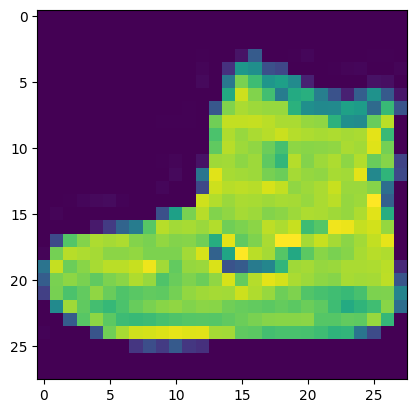

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 0, 'T-shirt/top')

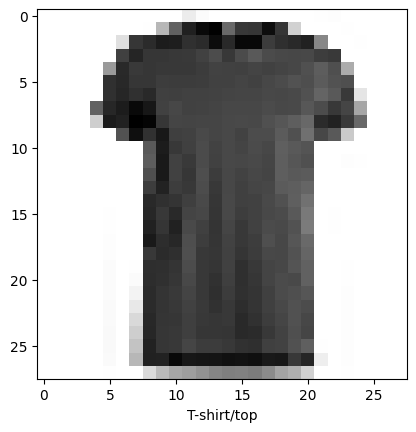

In [6]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[index_of_choice]])

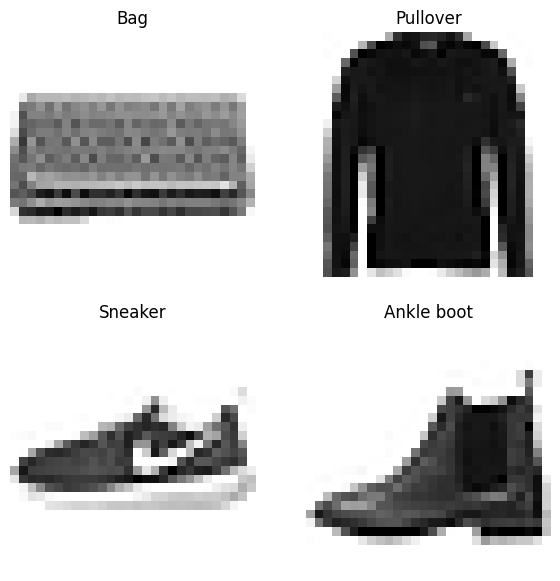

In [7]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building the model

In [8]:
# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit model
not_normalized_history = model.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1588 - loss: 2.6553 - val_accuracy: 0.2258 - val_loss: 1.7525
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2392 - loss: 1.7225 - val_accuracy: 0.2594 - val_loss: 1.6535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2712 - loss: 1.6390 - val_accuracy: 0.2976 - val_loss: 1.5881
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3019 - loss: 1.5854 - val_accuracy: 0.3116 - val_loss: 1.5562
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3122 - loss: 1.5571 - val_accuracy: 0.3144 - val_loss: 1.5369
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3141 - loss: 1.5404 - val_accuracy: 0.3225 - val_loss: 1.5224
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3151 - loss: 1.5270 - val_accuracy: 0.3509 - val_loss: 1.4756
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3759 - loss: 1.4676 - 

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [10]:
train_data.min(), train_data.max()

(0, 255)

In [11]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [12]:
# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit model
norm_history_1 = model_1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1639 - loss: 3.4173 - val_accuracy: 0.1000 - val_loss: 2.3724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3227 - loss: 1.4760 - val_accuracy: 0.1001 - val_loss: 2.7062
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4203 - loss: 1.3203 - val_accuracy: 0.1032 - val_loss: 3.0615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4732 - loss: 1.2301 - val_accuracy: 0.1242 - val_loss: 3.1781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4947 - loss: 1.2050 - val_accuracy: 0.1482 - val_loss: 3.1780
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5080 - loss: 1.1750 - val_accuracy: 0.1499 - val_loss: 3.3265
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5289 - loss: 1.1459 - val_accuracy: 0.2459 - val_loss: 3.2594
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5251 - loss: 1.1564 - 

<Axes: title={'center': 'normalized data'}>

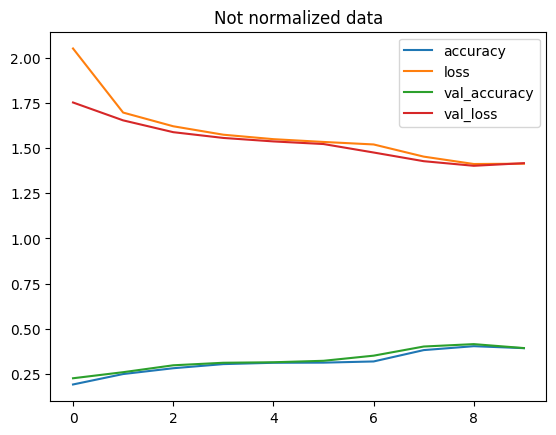

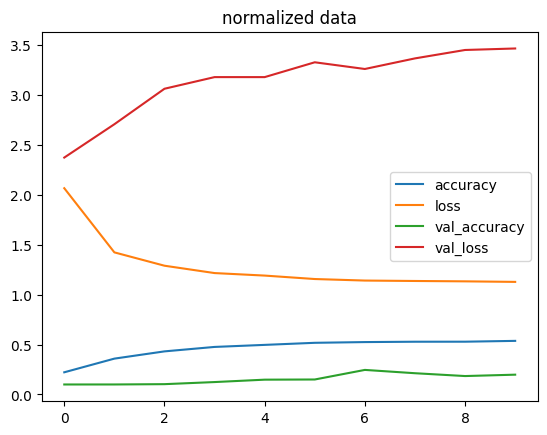

In [13]:
import pandas as pd
pd.DataFrame(not_normalized_history.history).plot(title="Not normalized data")
pd.DataFrame(norm_history_1.history).plot(title="normalized data")

## ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit model
norm_history_2 = model_2.fit(
    train_data,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0983 - loss: 6.0013 - val_accuracy: 0.1001 - val_loss: 2.3026 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0965 - loss: 2.3115 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0964 - loss: 2.3046 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0963 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0954 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0967 - loss: 2.3023 - val_accuracy: 0.1001 - val_loss: 2.3026 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accurac

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(40) / 20))
# plt.figure(figsize=(10, 7))
plt.semilogx(lrs, norm_history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")


In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit model
norm_history_2 = model_2.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    # callbacks=[lr_scheduler]
)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1612 - loss: 2.1875 - val_accuracy: 0.3010 - val_loss: 1.8645
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3157 - loss: 1.8072 - val_accuracy: 0.4261 - val_loss: 1.5677
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4701 - loss: 1.5123 - val_accuracy: 0.4848 - val_loss: 1.3912
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5101 - loss: 1.3485 - val_accuracy: 0.5295 - val_loss: 1.2602
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5394 - loss: 1.2288 - val_accuracy: 0.5383 - val_loss: 1.1793
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5490 - loss: 1.1553 - val_accuracy: 0.5438 - val_loss: 1.1273
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5549 - loss: 1.1060 - val_accuracy: 0.5509 - val_loss: 1.0899
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5633 - loss: 1.0695 - 

In [17]:
weigths, biases = model_2.layers[1].get_weights()

weigths, weigths.shape

(array([[ 0.25041145,  0.00206551, -0.05154695,  0.06475662],
        [-0.11970096, -0.03854275, -0.30012858, -0.02116982],
        [ 0.0618246 ,  0.05081464, -0.36661062, -0.28192276],
        ...,
        [ 0.19601688,  0.04222726, -0.01269785, -0.0404699 ],
        [ 0.04076721, -0.05221481, -0.1832991 ,  0.03349071],
        [ 0.0963528 ,  0.08198604, -0.11088784, -0.01637621]],
       dtype=float32),
 (784, 4))

In [18]:
biases, biases.shape

(array([ 0.86168903, -0.02285331, -0.21672472,  0.59155864], dtype=float32),
 (4,))

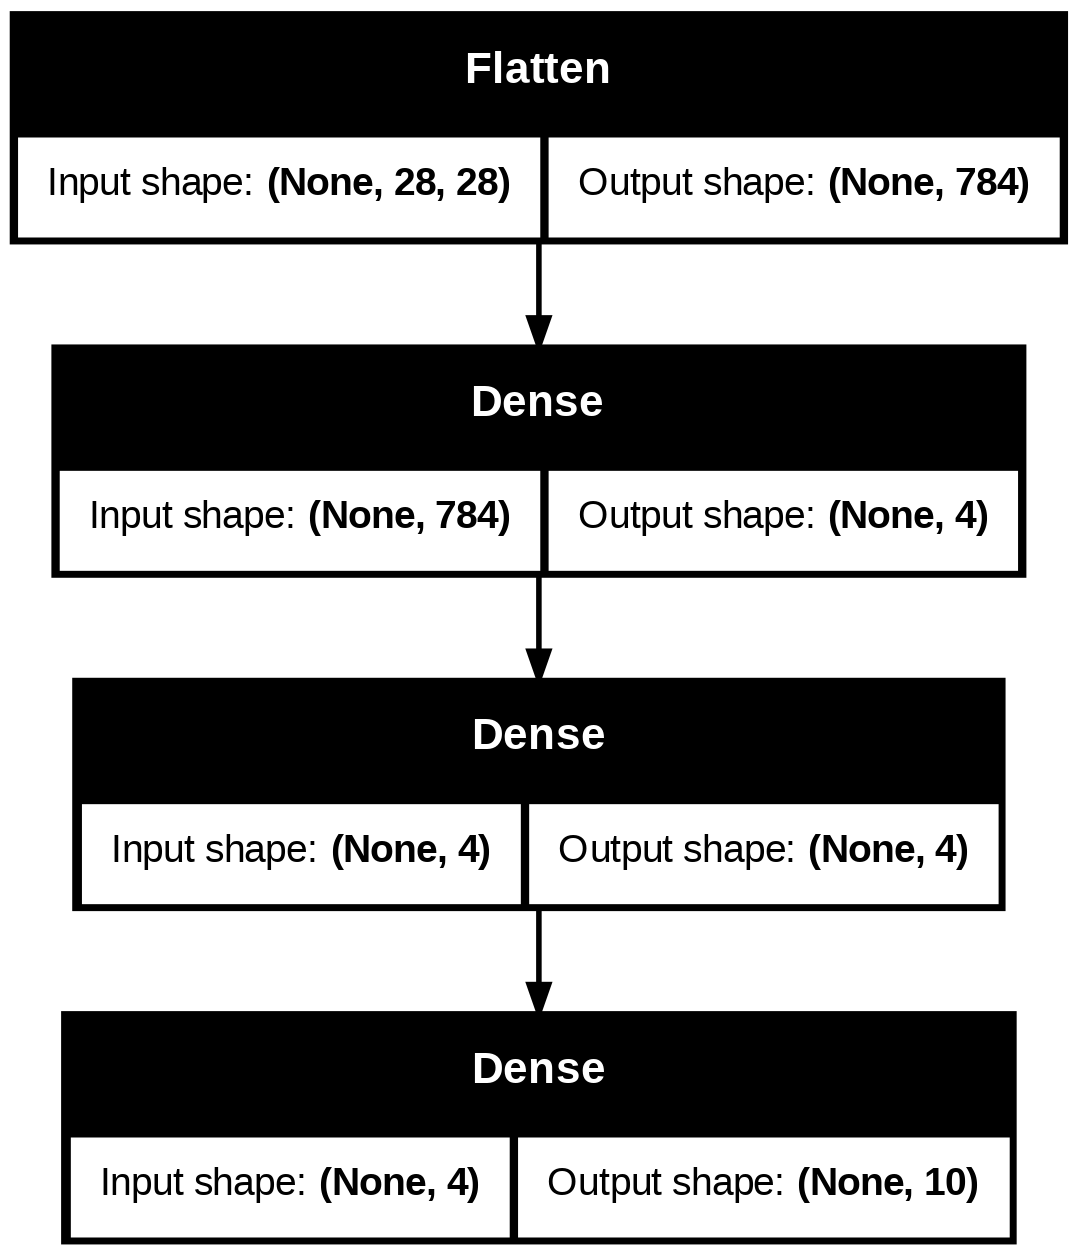

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)